In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os

# se supone que estan en la misma carpeta de research osea que no hace falta cambiar el directorio
from mystatistics.mystatistics import johansen_test

In [70]:
datapath='../data/EWA.csv'
df1 = pd.read_csv(datapath)

datapath='../data/EWC.csv'
df2 = pd.read_csv(datapath)


In [71]:
# Función que se queda solo con los valores de las series temporales que coinciden en el tiempo
print(df1.shape)
print(df2.shape)

print(df1.head())
print(df2.head())


(1500, 7)
(1500, 7)
         date       open       high        low      close  adj close  volume
0  2006-04-25  21.620001  21.660000  21.400000  21.510000  10.020755  197700
1  2006-04-26  21.950001  22.000000  21.850000  21.940001  10.221076  384800
2  2006-04-27  21.750000  21.950001  21.559999  21.820000  10.165171  384800
3  2006-04-28  21.809999  21.950001  21.719999  21.940001  10.221076  385100
4  2006-05-01  22.299999  22.340000  22.070000  22.150000  10.318909  619700
         date   open       high        low      close  adj close   volume
0  2006-04-25  24.84  25.030001  24.680000  24.799999  17.967710   400100
1  2006-04-26  25.02  25.059999  24.799999  24.870001  18.018425  1193600
2  2006-04-27  24.60  24.969999  24.500000  24.700001  17.895258  1351100
3  2006-04-28  24.82  24.920000  24.719999  24.860001  18.011179   433300
4  2006-05-01  25.00  25.230000  24.889999  24.969999  18.090876   665800


In [72]:
# mergeamos y comprobamos el merge
merge = pd.merge(df1,df2, how='inner', left_index=True, right_index=True)
print(merge.shape)
print(merge.head())

(1500, 14)
       date_x     open_x     high_x      low_x    close_x  adj close_x  \
0  2006-04-25  21.620001  21.660000  21.400000  21.510000    10.020755   
1  2006-04-26  21.950001  22.000000  21.850000  21.940001    10.221076   
2  2006-04-27  21.750000  21.950001  21.559999  21.820000    10.165171   
3  2006-04-28  21.809999  21.950001  21.719999  21.940001    10.221076   
4  2006-05-01  22.299999  22.340000  22.070000  22.150000    10.318909   

   volume_x      date_y  open_y     high_y      low_y    close_y  adj close_y  \
0    197700  2006-04-25   24.84  25.030001  24.680000  24.799999    17.967710   
1    384800  2006-04-26   25.02  25.059999  24.799999  24.870001    18.018425   
2    384800  2006-04-27   24.60  24.969999  24.500000  24.700001    17.895258   
3    385100  2006-04-28   24.82  24.920000  24.719999  24.860001    18.011179   
4    619700  2006-05-01   25.00  25.230000  24.889999  24.969999    18.090876   

   volume_y  
0    400100  
1   1193600  
2   1351100  
3

In [73]:
# nos quedamos solo con el close de cada time series

ts = merge[['close_x', 'close_y']]
ts = np.array(ts)

In [74]:
# probamos johansen test

p = 1 # lag
johansen_result = johansen_test(ts, p)

In [75]:
# analizamos el objeto creado por statsmodels

print(johansen_result.cvm)
print(johansen_result.lr2)

print(johansen_result.cvt)
print(johansen_result.lr1)


[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
[9.28991676 3.95898373]
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[13.24890048  3.95898373]


In [76]:
# una vez hemos comprobado que las series temporales cointegran vamos a generar una nueva serie temporal combinandolas que sea mean reverting
# para ello debemos coger los eigen vectors generados por coint_johansen
# vamos a ver que tenemos 2 eigen values con sus eigen vectors aociados
# deberemos escoger los evec asociados al mayor eig
print(johansen_result.eig)
print(johansen_result.evec)

ponderaciones = johansen_result.evec[0]

mr_ts = ts[:,0]*ponderaciones[0] + ts[:,1]*ponderaciones[1]



[0.00618236 0.00263936]
[[ 0.54747604 -0.14624175]
 [-0.55981817 -0.0774428 ]]


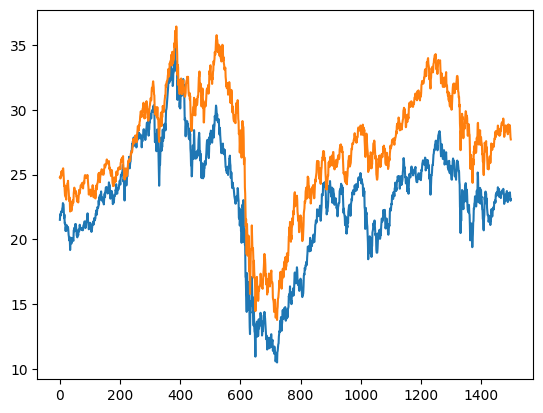

In [81]:
plt.plot(ts[:,0])
plt.plot(ts[:,1])


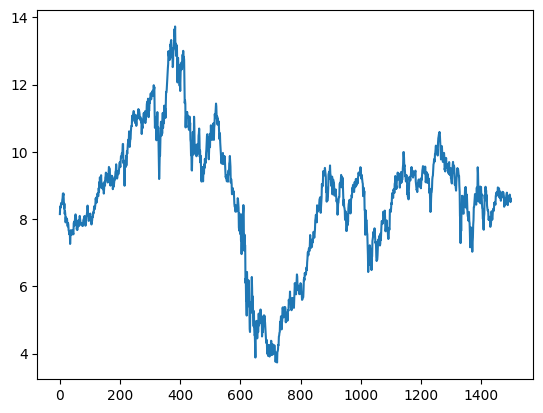

In [78]:
plt.plot(mr_ts)